In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

#INSTALL DATASET

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/datasets/fahmidachowdhury/customer-segmentation-data-for-marketing-analysis/data'
od.download(dataset_url)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: naitridoshi678
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/fahmidachowdhury/customer-segmentation-data-for-marketing-analysis


100%|██████████| 16.4k/16.4k [00:00<00:00, 11.7MB/s]

In [4]:
import os
os.listdir('/content/customer-segmentation-data-for-marketing-analysis')

['customer_segmentation_data.csv']

#CLEAN THE DATA

In [5]:
df=pd.read_csv('/content/customer-segmentation-data-for-marketing-analysis/customer_segmentation_data.csv',encoding='unicode_escape')
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [6]:
df.set_index('id',inplace=True)

In [7]:
df.shape

(1000, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1000 non-null   int64  
 1   gender                1000 non-null   object 
 2   income                1000 non-null   int64  
 3   spending_score        1000 non-null   int64  
 4   membership_years      1000 non-null   int64  
 5   purchase_frequency    1000 non-null   int64  
 6   preferred_category    1000 non-null   object 
 7   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 70.3+ KB


In [9]:
df.columns

Index(['age', 'gender', 'income', 'spending_score', 'membership_years',
       'purchase_frequency', 'preferred_category', 'last_purchase_amount'],
      dtype='object')

In [10]:
df.isnull().sum()

age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

In [11]:
df.describe()

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


In [12]:
df.head()

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
id,,,,,,,,
1,38,Female,99342,90,3,24,Groceries,113.53
2,21,Female,78852,60,2,42,Sports,41.93
3,60,Female,126573,30,2,28,Clothing,424.36
4,40,Other,47099,74,9,5,Home & Garden,991.93
5,65,Female,140621,21,3,25,Electronics,347.08


#EDA

([<matplotlib.patches.Wedge at 0x7b704aba88b0>,
 [Text(0.4777168749993118, 0.9908514456470718, 'Male'),
  Text(-1.0951181606757017, -0.10351914875166021, 'Female'),
  Text(0.5688441124233878, -0.9414968803778632, 'Other')],
 [Text(0.2605728409087155, 0.5404644248984027, '35.7%'),
  Text(-0.5973371785503827, -0.05646499022817829, '31.6%'),
  Text(0.3102786067763933, -0.5135437529333798, '32.7%')])

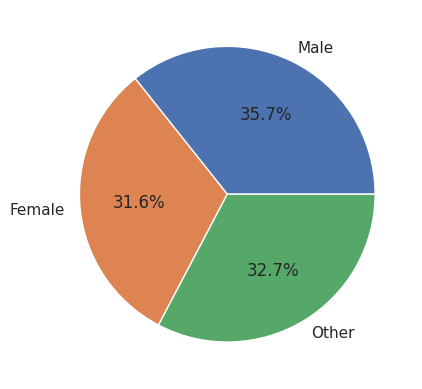

In [166]:
# What is the gender distribution of the customers?

male=(df['gender']=='Male').sum()
female=(df['gender']=='Female').sum()
other=(df['gender']=='Other').sum()

fig, ax = plt.subplots()
ax.pie([male,female,other], labels=['Male','Female','Other'], autopct='%1.1f%%')

In [14]:
df['preferred_category'].unique()

array(['Groceries', 'Sports', 'Clothing', 'Home & Garden', 'Electronics'],
      dtype=object)

([<matplotlib.patches.Wedge at 0x7b704abdbc70>,
 [Text(0.8919455369868552, 0.6437648321003802, 'Groceries'),
  Text(-0.36610148382486773, 1.0372895948293468, 'Sports'),
  Text(-1.0992184186780336, 0.04145923345846502, 'Clothing'),
  Text(-0.45581316233797403, -1.0011165571697713, 'HomeGarden'),
  Text(0.8584734403449563, -0.6877669316144059, 'Electronics')],
 [Text(0.4865157474473755, 0.35114445387293464, '19.9%'),
  Text(-0.19969171844992784, 0.5657943244523709, '21.0%'),
  Text(-0.599573682915291, 0.02261412734098092, '17.0%'),
  Text(-0.24862536127525853, -0.5460635766380569, '20.6%'),
  Text(0.4682582401881579, -0.37514559906240325, '21.5%')])

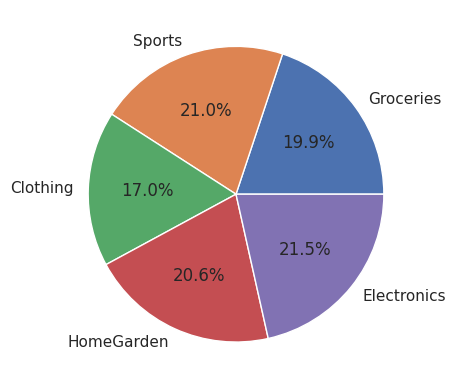

In [167]:
# # What is the category distribution of the customers?

Groceries=(df['preferred_category']=='Groceries').sum()
Sports=(df['preferred_category']=='Sports').sum()
Clothing=(df['preferred_category']=='Clothing').sum()
HomeGarden=(df['preferred_category']=='Home & Garden').sum()
Electronics=(df['preferred_category']=='Electronics').sum()
fig, ax = plt.subplots()
ax.pie([Groceries,Sports,Clothing,HomeGarden,Electronics], labels=['Groceries','Sports','Clothing','HomeGarden','Electronics'], autopct='%1.1f%%')

In [16]:
df.age.unique()

array([38, 21, 60, 40, 65, 31, 19, 43, 53, 55, 23, 68, 29, 64, 33, 57, 22,
       37, 36, 41, 69, 54, 30, 18, 44, 45, 47, 48, 52, 35, 28, 50, 49, 56,
       61, 24, 42, 63, 27, 32, 58, 59, 39, 46, 26, 20, 62, 66, 67, 51, 25,
       34])

In [17]:
def generate_age_group(age):
  if age>=15 and age<=20:
    return '[15-20]'
  elif age>=21 and age<=30:
    return '[21-30]'
  elif age>=31 and age<=40:
    return '[31-40]'
  elif age>=41 and age<=50:
    return '[41-50]'
  elif age>=51 and age<=60:
    return '[51-60]'
  elif age>=61 and age<=70:
    return '[61-70]'

In [18]:
df['age_group']=df['age'].apply(generate_age_group)

<Axes: xlabel='preferred_category', ylabel='Count'>

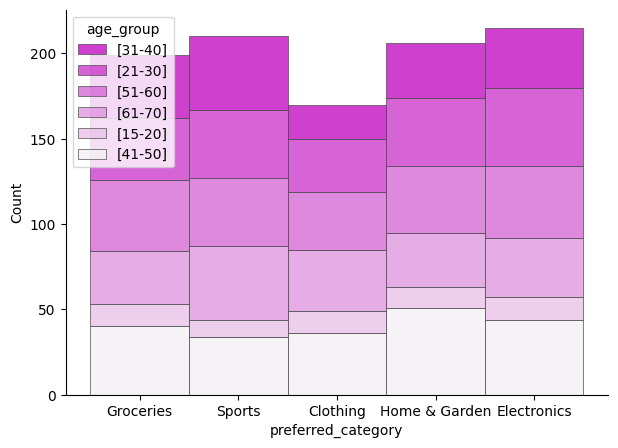

In [19]:
#  What is the gender distribution of the customers among different age groups?

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.histplot( data=df,x=df['preferred_category'],hue='age_group',multiple="stack",palette="light:m_r",edgecolor=".3",linewidth=.5,log_scale=True)

In [20]:
df.head()

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,age_group
id,,,,,,,,,
1,38,Female,99342,90,3,24,Groceries,113.53,[31-40]
2,21,Female,78852,60,2,42,Sports,41.93,[21-30]
3,60,Female,126573,30,2,28,Clothing,424.36,[51-60]
4,40,Other,47099,74,9,5,Home & Garden,991.93,[31-40]
5,65,Female,140621,21,3,25,Electronics,347.08,[61-70]


([<matplotlib.patches.Wedge at 0x7b705cafbca0>,
 [Text(1.0798631009498705, 0.20951296667970273, '[15-20]'),
  Text(0.6039250851644595, 0.9193881071175005, '[21-30]'),
  Text(-0.5747484343594826, 0.9379041727177269, '[31-40]'),
  Text(-1.0880306948673495, -0.1618307975215865, '[41-50]'),
  Text(-0.1754902848024704, -1.0859112118124334, '[51-60]'),
  Text(0.93427442474197, -0.5806300881568757, '[61-70]')],
 [Text(0.5890162368817474, 0.11427980000711056, '6.1%'),
  Text(0.32941368281697786, 0.5014844220640912, '19.3%'),
  Text(-0.31349914601426326, 0.5115840942096691, '16.7%'),
  Text(-0.5934712881094634, -0.08827134410268354, '20.5%'),
  Text(-0.0957219735286202, -0.5923152064431455, '19.7%'),
  Text(0.5096042316774382, -0.3167073208128412, '17.7%')])

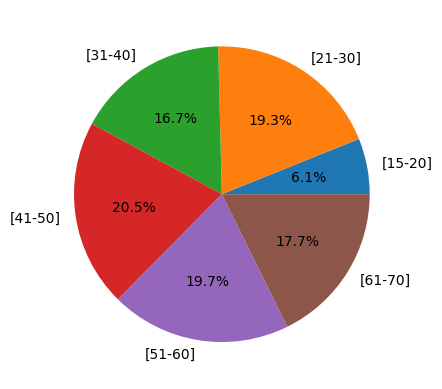

In [23]:
# What is the age distribution of the customers?

age1=(df['age_group']=='[15-20]').sum()
age2=(df['age_group']=='[21-30]').sum()
age3=(df['age_group']=='[31-40]').sum()
age4=(df['age_group']=='[41-50]').sum()
age5=(df['age_group']=='[51-60]').sum()
age6=(df['age_group']=='[61-70]').sum()

fig, ax = plt.subplots()
ax.pie([age1,age2,age3,age4,age5,age6], labels=['[15-20]','[21-30]','[31-40]','[41-50]','[51-60]','[61-70]'], autopct='%1.1f%%')

In [48]:
def generate_income_group(income):
  if income>=30000 and income<40000:
    return '[30k-40k]'
  elif income>=40000 and income<50000:
    return '[40k-50k]'
  elif income>=50000 and income<60000:
    return '[50k-60k]'
  elif income>=60000 and income<70000:
    return '[60k-70k]'
  elif income>=70000 and income<80000:
    return '[70k-80k]'
  elif income>=80000 and income<90000:
    return '[80k-90k]'
  elif income>=90000 and income<100000:
    return '[90k-100k]'
  elif income>=100000 and income<110000:
    return '[100k-110k]'
  elif income>=110000 and income<120000:
    return '[110k-120k]'
  elif income>=120000 and income<130000:
    return '[120k-130k]'
  elif income>=130000 and income<140000:
    return '[130k-140k]'
  elif income>=140000 and income<150000:
    return '[140k-150k]'

df['income_group']=df['income'].apply(generate_income_group)

In [49]:
df.head()

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,age_group,income_group
id,,,,,,,,,,
1,38,Female,99342,90,3,24,Groceries,113.53,[31-40],[90k-100k]
2,21,Female,78852,60,2,42,Sports,41.93,[21-30],[70k-80k]
3,60,Female,126573,30,2,28,Clothing,424.36,[51-60],[120k-130k]
4,40,Other,47099,74,9,5,Home & Garden,991.93,[31-40],[40k-50k]
5,65,Female,140621,21,3,25,Electronics,347.08,[61-70],[140k-150k]


([<matplotlib.patches.Wedge at 0x7b704aa68820>,
 [Text(1.067139254789918, 0.26685915927023873, '[90k-100k]'),
  Text(0.763018624672979, 0.7923399386640534, '[70k-80k]'),
  Text(0.17890085996807167, 1.0853545422131354, '[120k-130k]'),
  Text(-0.39850292967721224, 1.0252782134809453, '[40k-50k]'),
  Text(-0.8228327987520655, 0.7300316330802681, '[140k-150k]'),
  Text(-1.0791995748487953, 0.21290438616003066, '[50k-60k]'),
  Text(-1.02652508827348, -0.3952799554051842, '[100k-110k]'),
  Text(-0.6796455675970986, -0.8649172806954535, '[30k-40k]'),
  Text(-0.12414201803959353, -1.092972442176406, '[60k-70k]'),
  Text(0.4273288342009461, -1.0136025194623683, '[80k-90k]'),
  Text(0.8296765354445772, -0.7222443122189911, '[110k-120k]'),
  Text(1.0662956382069828, -0.27021031057449163, '[130k-140k]')],
 [Text(0.582075957158137, 0.1455595414201302, '7.8%'),
  Text(0.41619197709435213, 0.4321854210894836, '10.0%'),
  Text(0.0975822872553118, 0.592011568479892, '9.2%'),
  Text(-0.21736523436938845

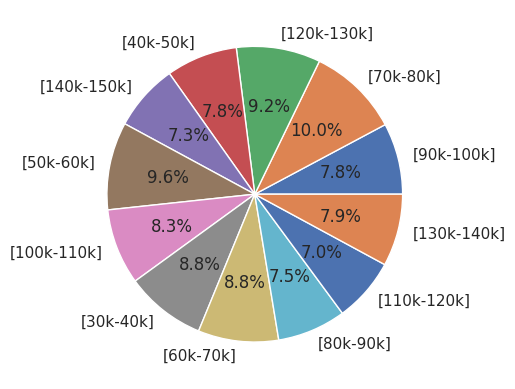

In [168]:
# What is the distribution of annual income among customers?

income1=(df['income_group']=='[30k-40k]').sum()
income2=(df['income_group']=='[40k-50k]').sum()
income3=(df['income_group']=='[50k-60k]').sum()
income4=(df['income_group']=='[60k-70k]').sum()
income5=(df['income_group']=='[70k-80k]').sum()
income6=(df['income_group']=='[80k-90k]').sum()
income7=(df['income_group']=='[90k-100k]').sum()
income8=(df['income_group']=='[100k-110k]').sum()
income9=(df['income_group']=='[110k-120k]').sum()
income10=(df['income_group']=='[120k-130k]').sum()
income11=(df['income_group']=='[130k-140k]').sum()
income12=(df['income_group']=='[140k-150k]').sum()

fig, ax = plt.subplots()
ax.pie([income1,income2,income3,income4,income5,income6,income7,income8,income9,income10,income11,income12], labels=df['income_group'].unique(), autopct='%1.1f%%')

<Axes: xlabel='spending_score', ylabel='Count'>

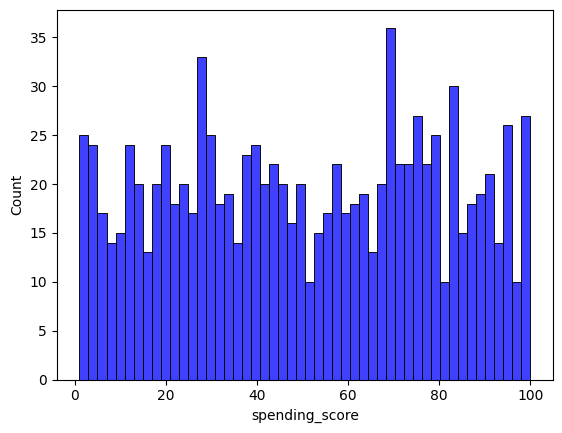

In [57]:
# How is the spending score distributed among customers

sns.histplot(data=df,x='spending_score',bins=50,color='blue')

<Axes: xlabel='membership_years', ylabel='Count'>

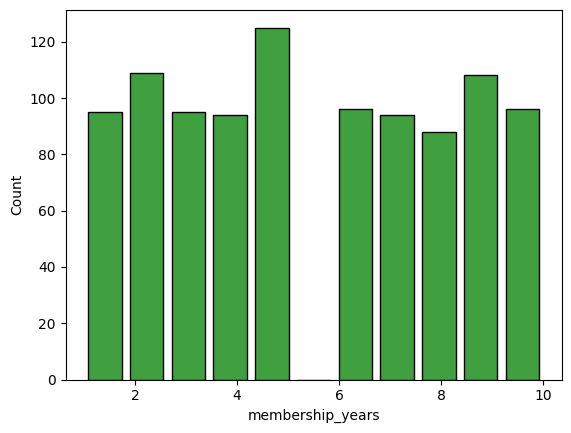

In [64]:
# What is the distribution of membership years among customers?

sns.histplot(data=df,x='membership_years',color='green',shrink=.8)

In [66]:
df['purchase_frequency'].unique()

array([24, 42, 28,  5, 25, 30, 43, 27,  7,  2, 49,  3,  8, 26, 13, 31, 21,
       17,  4, 47, 16,  9, 39,  1, 20, 18, 37, 48,  6, 38, 50, 29, 41, 34,
       45, 10, 35, 36, 19, 14, 40, 15, 11, 32, 44, 46, 23, 12, 22, 33])

<Axes: xlabel='purchase_frequency', ylabel='Count'>

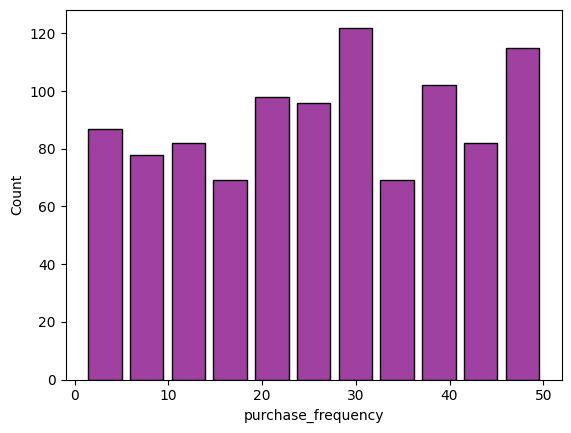

In [67]:
# How frequently do customers make purchases?

sns.histplot(data=df,x='purchase_frequency', color='purple', shrink=0.8)

<Axes: xlabel='preferred_category', ylabel='Count'>

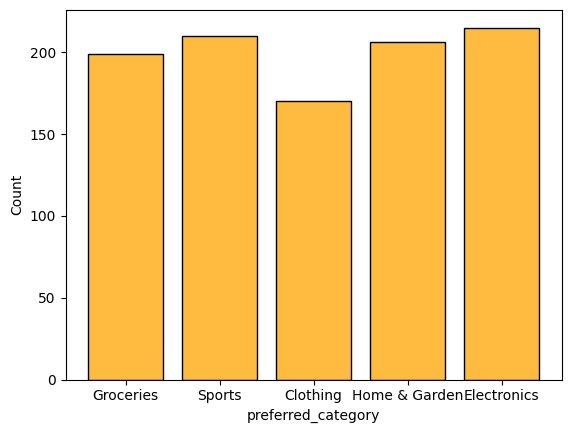

In [68]:
# What are the most and least preferred shopping categories?

sns.histplot(data=df,x='preferred_category', color='orange', shrink=0.8)

<Axes: xlabel='preferred_category', ylabel='age'>

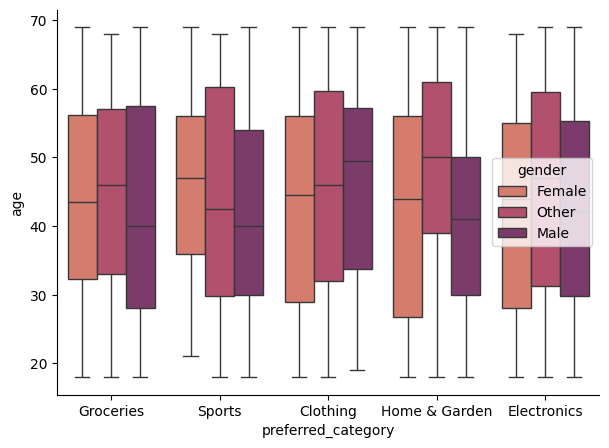

In [70]:
# How does the preferred category vary with age and gender?

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.boxplot(data=df,x='preferred_category',y='age',hue='gender',palette='flare')

In [101]:
(df['last_purchase_amount'].unique()<0).sum()

0

<Axes: xlabel='last_purchase_amount'>

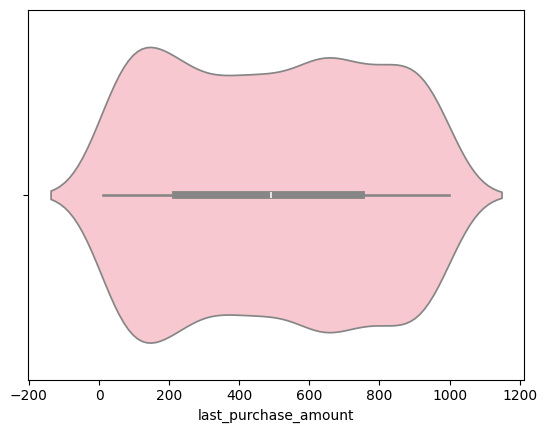

In [104]:
# What is the distribution of the amount spent on the last purchase?

sns.violinplot(data=df, x='last_purchase_amount',color='pink')

<Axes: xlabel='income_group', ylabel='spending_score'>

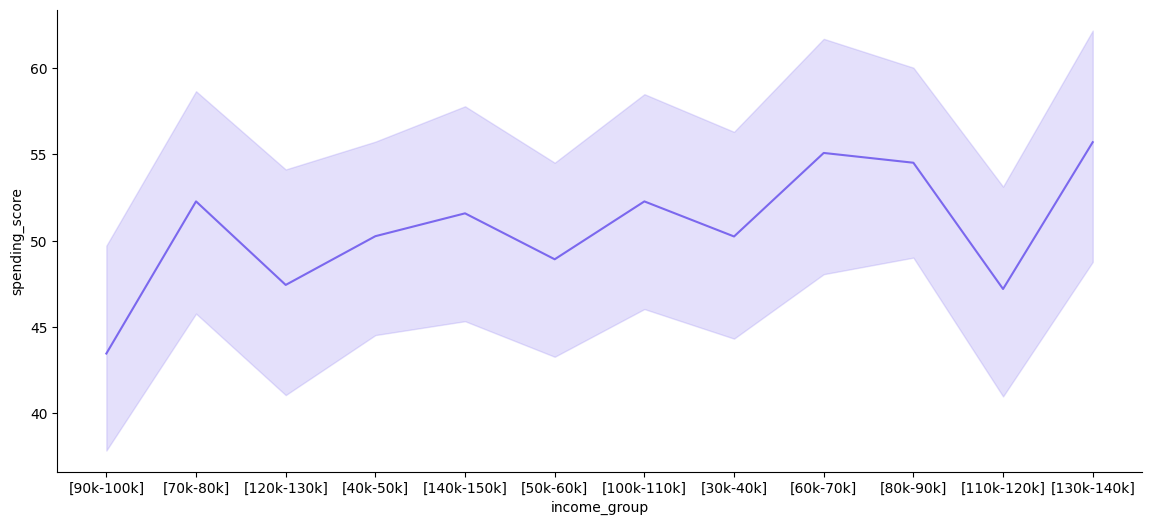

In [118]:
# How does spending score correlate with income?

f, ax = plt.subplots(figsize=(14, 6))
sns.despine(f)
sns.lineplot(data=df,x='income_group',y='spending_score',color='mediumslateblue')

<Axes: xlabel='preferred_category', ylabel='last_purchase_amount'>

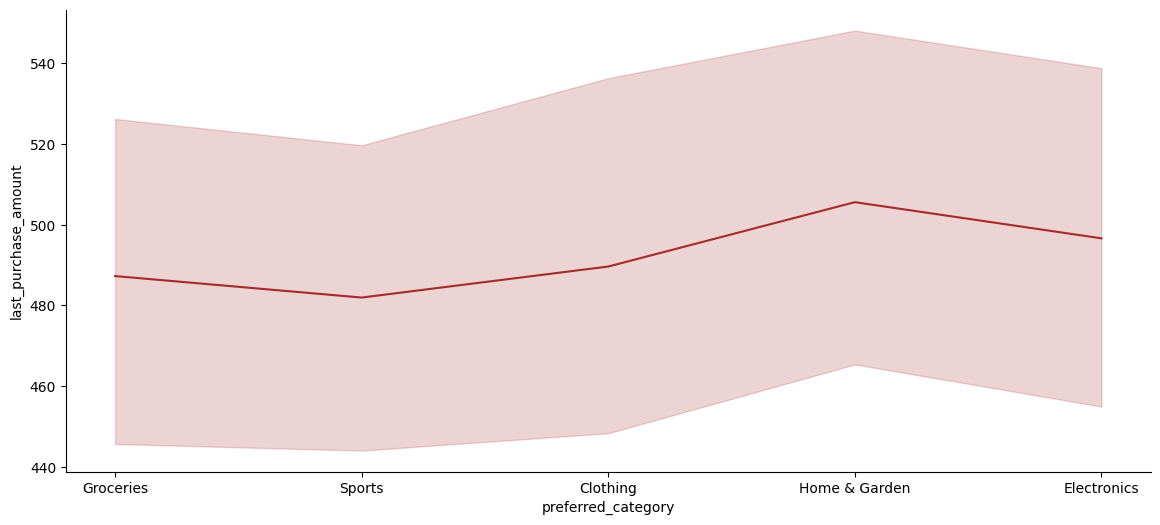

In [120]:
# How does the last purchase amount vary with the preferred category?

f, ax = plt.subplots(figsize=(14, 6))
sns.despine(f)
sns.lineplot(data=df,x='preferred_category',y='last_purchase_amount',color='brown')

In [124]:
df['membership_years'].unique()

array([ 3,  2,  9,  5,  6,  7,  1,  4, 10,  8])

<Axes: xlabel='membership_years', ylabel='spending_score'>

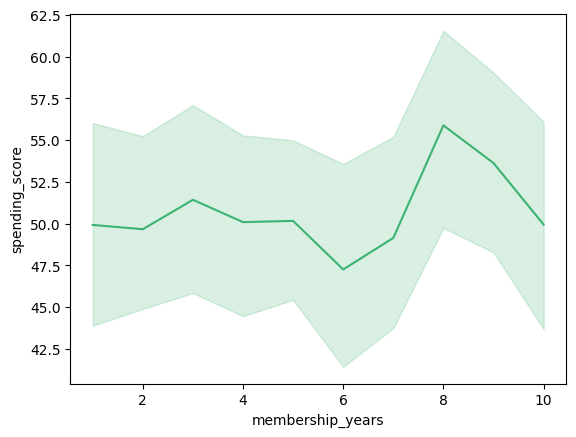

In [131]:
# How does the number of membership years correlate with spending score?

sns.lineplot(data=df,x='membership_years',y='spending_score',color='mediumseagreen')

<Axes: xlabel='membership_years', ylabel='purchase_frequency'>

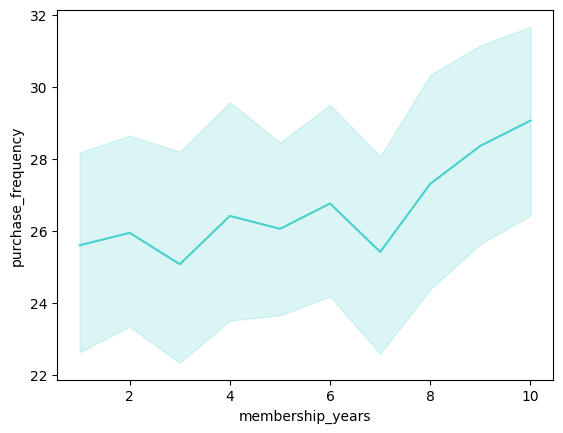

In [132]:
# What is the relationship between purchase frequency and membership years?

sns.lineplot(data=df,x='membership_years',y='purchase_frequency',color='mediumturquoise')

<Axes: xlabel='gender', ylabel='spending_score'>

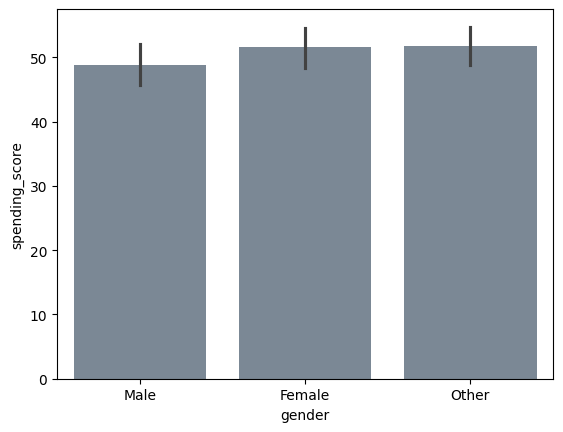

In [135]:
# How do spending habits differ between male and female customers?

sns.barplot(data=df,x='gender',y='spending_score',color='lightslategray',order=['Male','Female','Other'])

<Axes: xlabel='income_group', ylabel='purchase_frequency'>

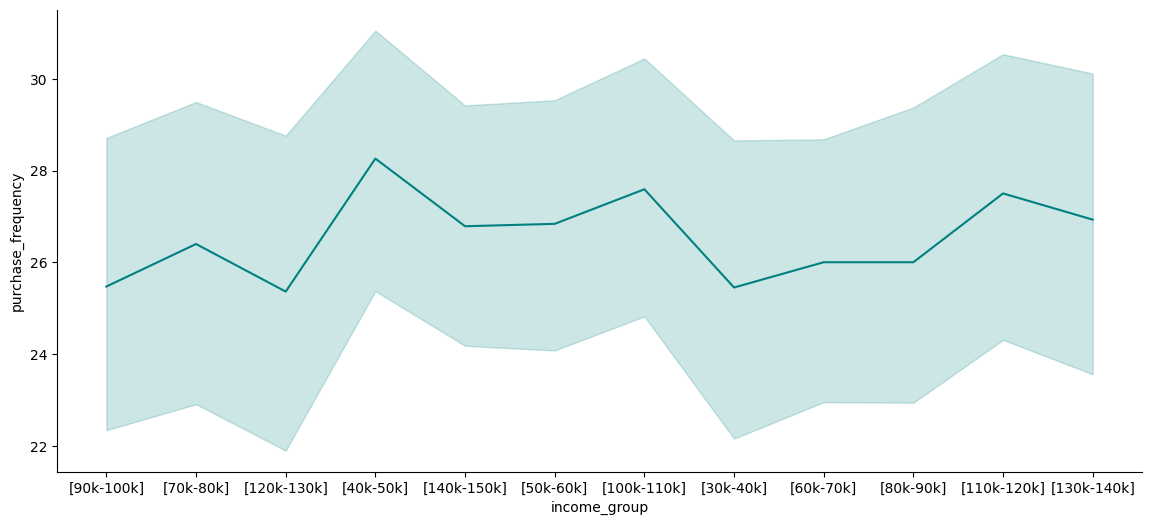

In [137]:
# Is there a difference in purchase frequency across different income groups?

f, ax = plt.subplots(figsize=(14, 6))
sns.despine(f)
sns.lineplot(data=df,x='income_group',y='purchase_frequency',color='teal')

<Axes: xlabel='age_group', ylabel='income'>

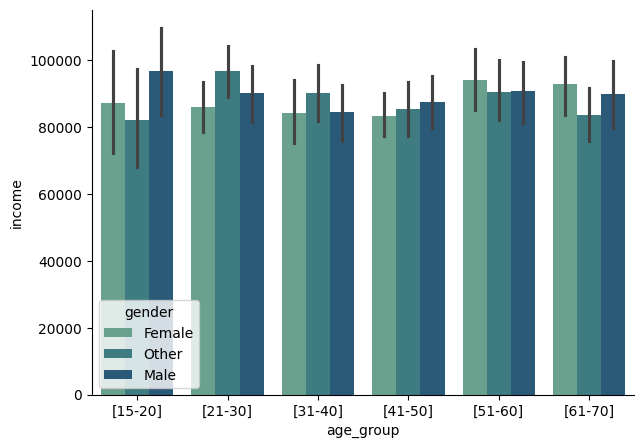

In [155]:
# How is income distributed among different age groups and gender?

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.barplot(data=df,x='age_group',y='income',hue='gender',order=df.sort_values('age').age_group,palette='crest')

<Axes: xlabel='age_group', ylabel='membership_years'>

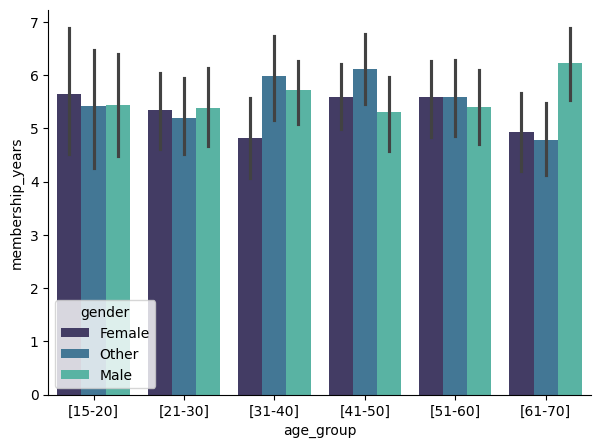

In [156]:
# Which age group and gender have the most membership years?

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.barplot(data=df,x='age_group',y='membership_years',hue='gender',order=df.sort_values('age').age_group, palette='mako')

<Axes: xlabel='preferred_category', ylabel='spending_score'>

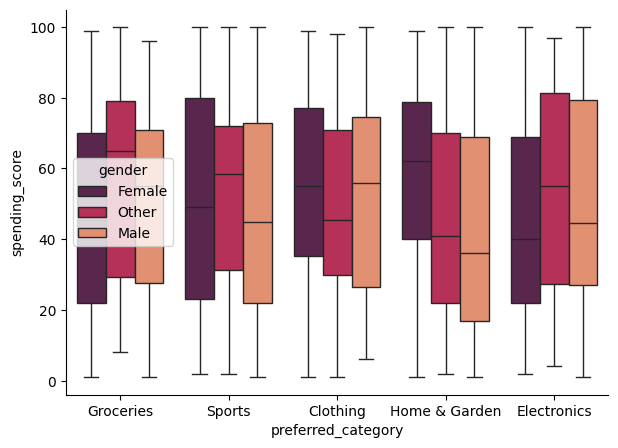

In [157]:
# Which category has the most spending score among different genders?

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.boxplot(data=df,x='preferred_category',y='spending_score',hue='gender',palette='rocket')

<Axes: xlabel='preferred_category', ylabel='purchase_frequency'>

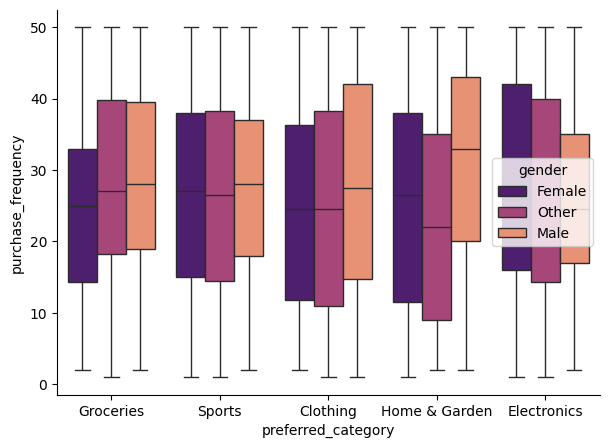

In [161]:
# # Which category has the most purchase_frequency among different genders?

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.boxplot(data=df,x='preferred_category',y='purchase_frequency',hue='gender',palette='magma')

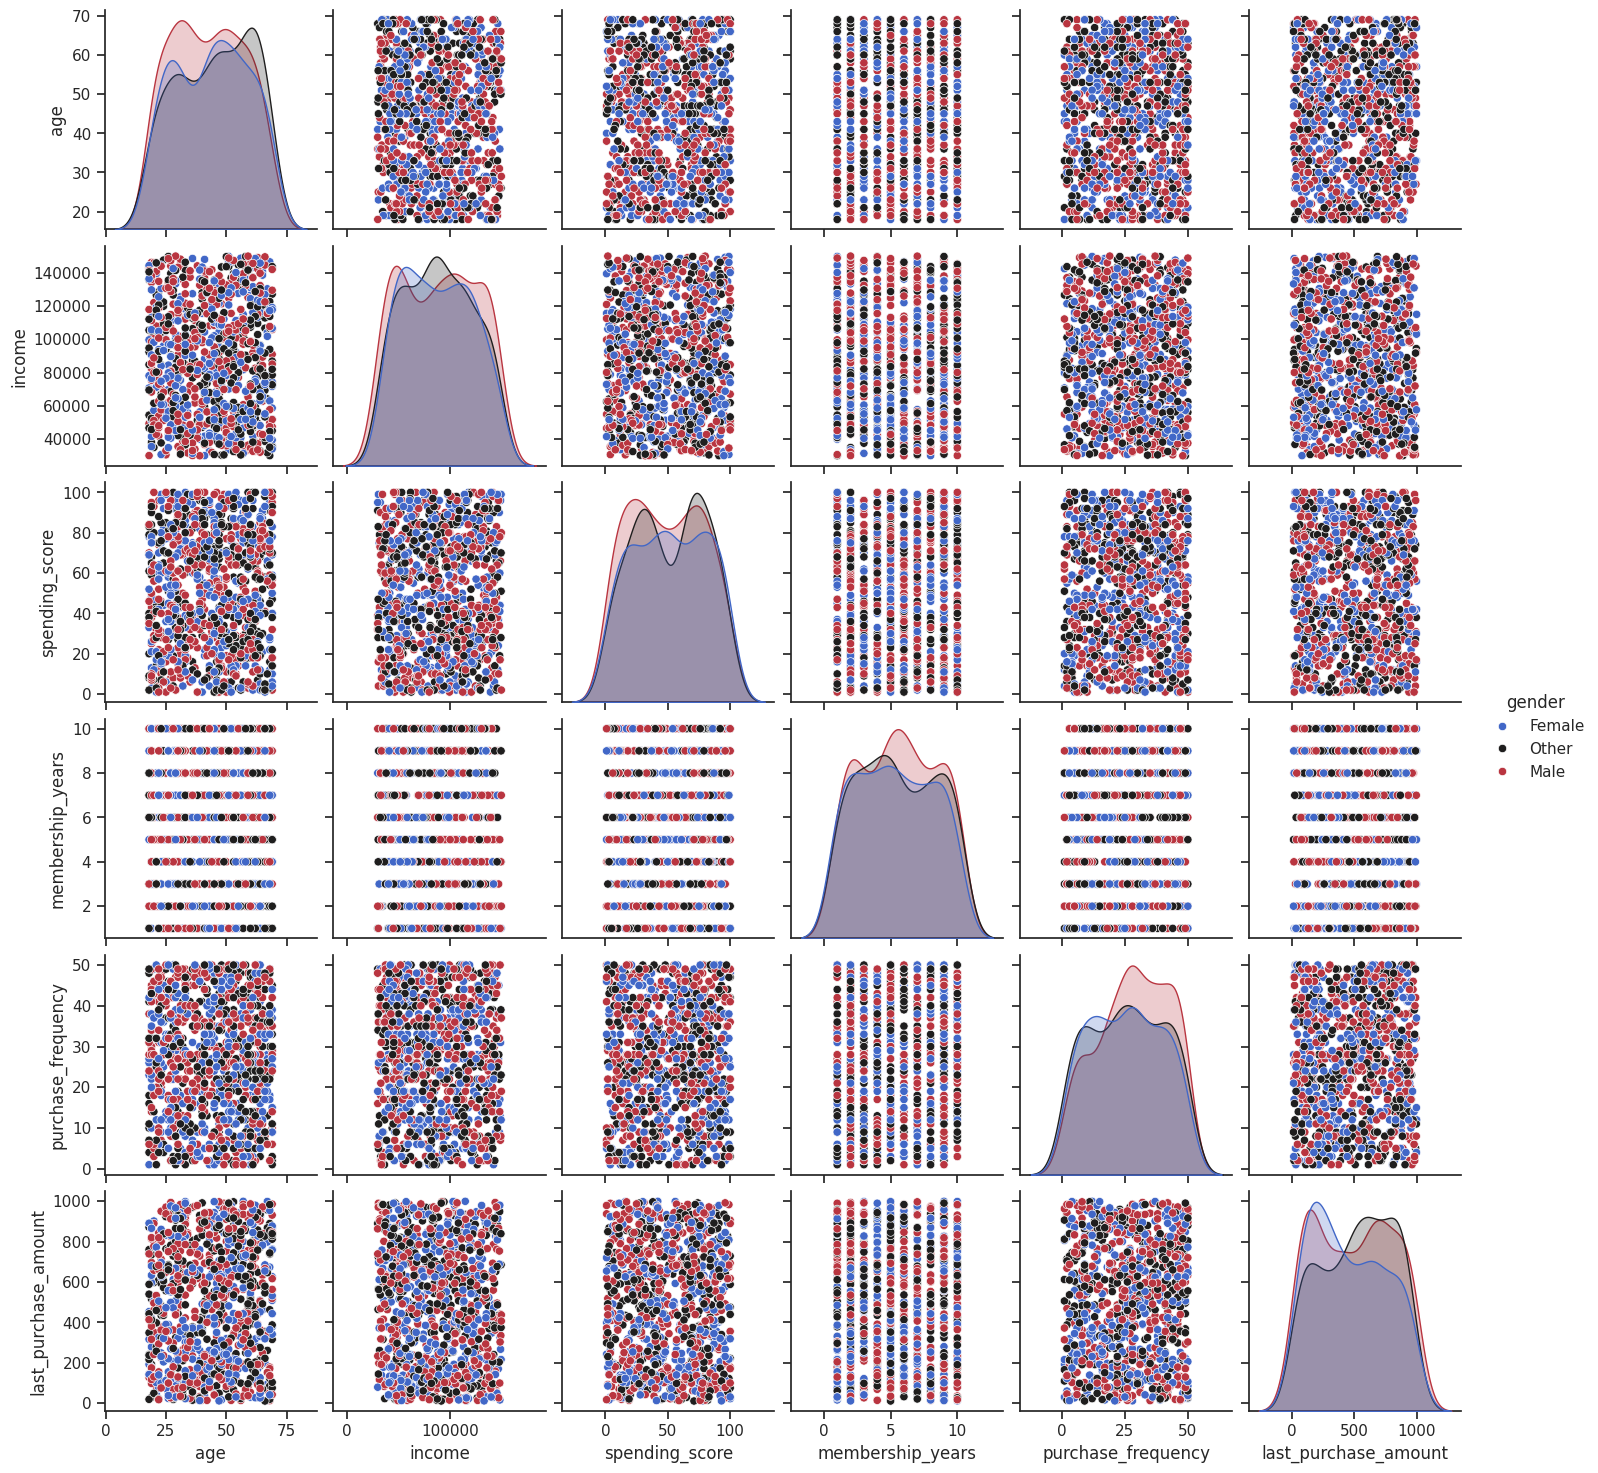

In [163]:
# Complete pair plot

sns.set_theme(style="ticks")
sns.pairplot(df,hue='gender',palette='icefire')